# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,GRU,LSTM,Bidirectional
from tensorflow.keras.layers import Embedding
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rohan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [4]:
data=pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)


In [5]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


<Axes: ylabel='count'>

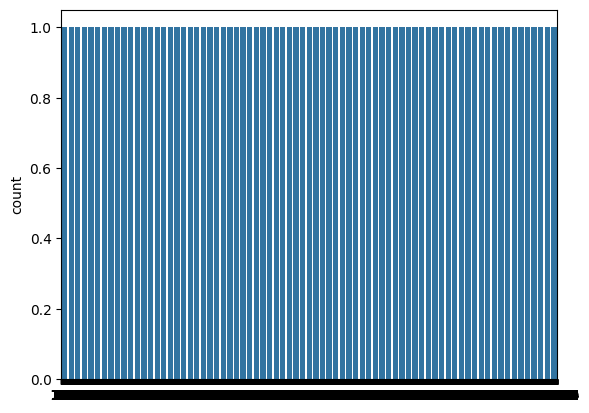

In [6]:
sns.countplot(data.is_sarcastic)

# Cleaning the data

In [8]:
def clean_text(text):
    text = text.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text

In [9]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Uncomment the following line to download the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def CleanTokenize(df):
    head_lines = list()
    lines = df["headline"].values.tolist()

    for line in lines:
        line = clean_text(line)
        tokens = word_tokenize(line)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        words = [w for w in words if not w in stop_words]
        head_lines.append(words)
    return head_lines

head_lines = CleanTokenize(data)
head_lines[0:10]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['former',
  'versace',
  'store',
  'clerk',
  'sues',
  'secret',
  'black',
  'code',
  'minority',
  'shoppers'],
 ['roseanne',
  'revival',
  'catches',
  'thorny',
  'political',
  'mood',
  'better',
  'worse'],
 ['mom',
  'starting',
  'fear',
  'sons',
  'web',
  'series',
  'closest',
  'thing',
  'grandchild'],
 ['boehner',
  'wants',
  'wife',
  'listen',
  'come',
  'alternative',
  'debtreduction',
  'ideas'],
 ['jk', 'rowling', 'wishes', 'snape', 'happy', 'birthday', 'magical', 'way'],
 ['advancing', 'worlds', 'women'],
 ['fascinating', 'case', 'eating', 'labgrown', 'meat'],
 ['ceo', 'send', 'kids', 'school', 'work', 'company'],
 ['top', 'snake', 'handler', 'leaves', 'sinking', 'huckabee', 'campaign'],
 ['fridays', 'morning', 'email', 'inside', 'trumps', 'presser', 'ages']]

In [10]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rohan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


# Wordcloud for the text that is not Sarcastic (Label - 0)

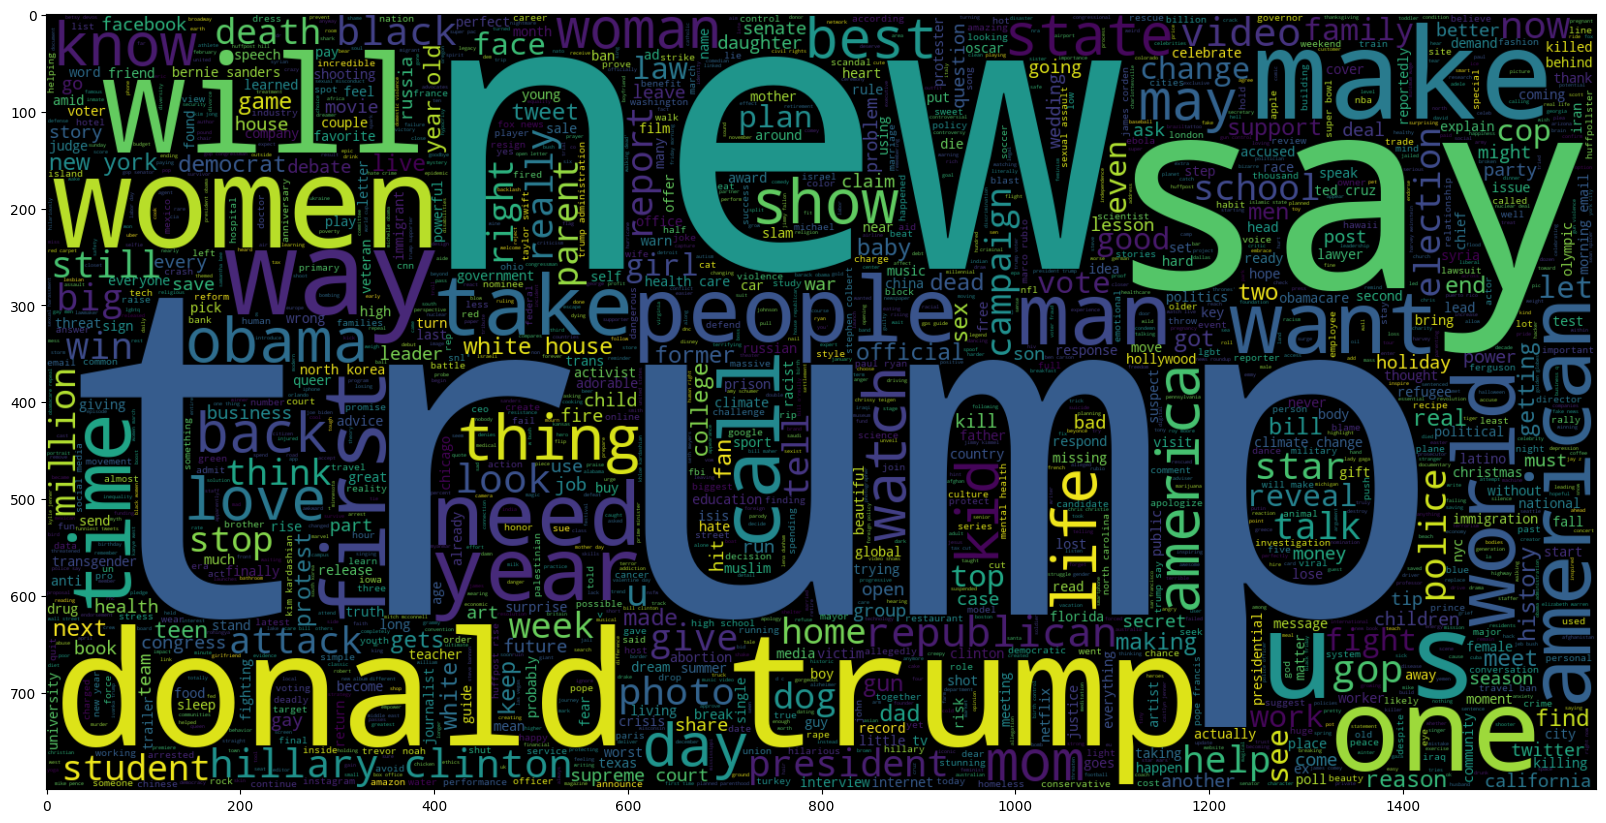

In [11]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

# Wordcloud for the text that is Sarcastic (Label - 1)

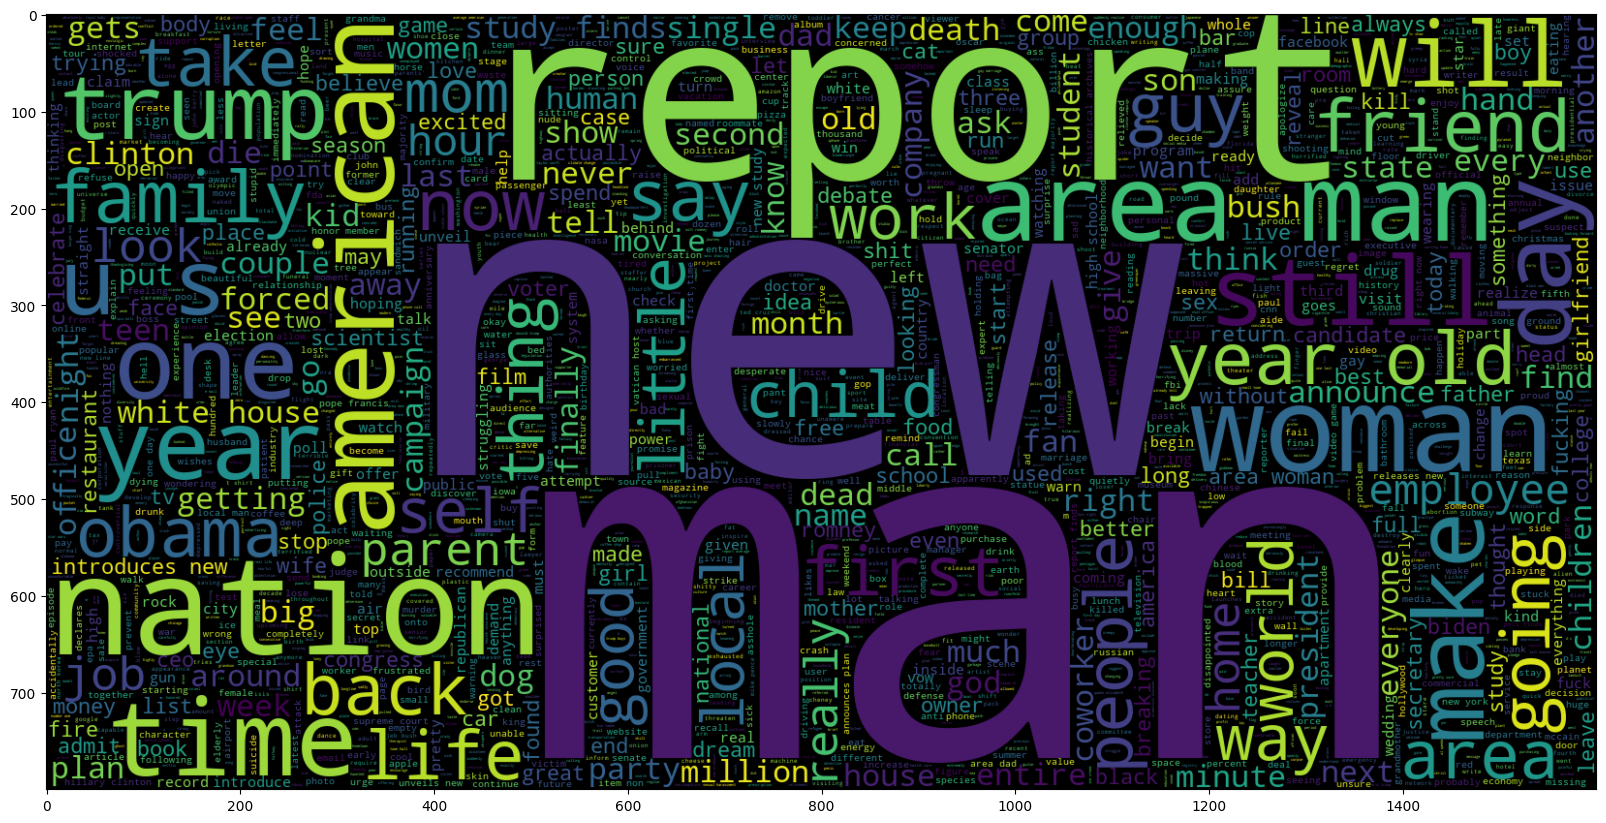

In [12]:
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

In [13]:
validation_split = 0.2
max_length = 25


tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(head_lines)
sequences = tokenizer_obj.texts_to_sequences(head_lines)

word_index = tokenizer_obj.word_index
print("unique tokens - ",len(word_index))
vocab_size = len(tokenizer_obj.word_index) + 1
print('vocab size -', vocab_size)

lines_pad = pad_sequences(sequences, maxlen=max_length, padding='post')
sentiment =  data['is_sarcastic'].values

indices = np.arange(lines_pad.shape[0])
np.random.shuffle(indices)
lines_pad = lines_pad[indices]
sentiment = sentiment[indices]

num_validation_samples = int(validation_split * lines_pad.shape[0])

X_train_pad = lines_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = lines_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

unique tokens -  27483
vocab size - 27484


In [14]:
print('Shape of X_train_pad:', X_train_pad.shape)
print('Shape of y_train:', y_train.shape)

print('Shape of X_test_pad:', X_test_pad.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train_pad: (21368, 25)
Shape of y_train: (21368,)
Shape of X_test_pad: (5341, 25)
Shape of y_test: (5341,)


In [15]:
embeddings_index = {}
embedding_dim = 100
GLOVE_DIR = "glove"
f = open(os.path.join(GLOVE_DIR, 'glove.txt'), encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


Found 1193514 word vectors.


In [16]:
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
c = 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        c+=1
        embedding_matrix[i] = embedding_vector
print(c)


23813


In [17]:
embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)


# Build the LSTM

In [18]:
model = Sequential()
model.add(embedding_layer)
# model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.25))
model.add(LSTM(64, dropout=0.4, recurrent_dropout=0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print('Summary of the built model...')
print(model.summary())


Summary of the built model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 100)           2748400   
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2790705 (10.65 MB)
Trainable params: 42305 (165.25 KB)
Non-trainable params: 2748400 (10.48 MB)
_________________________________________________________________
None


In [19]:
history = model.fit(X_train_pad, y_train, batch_size=32, epochs=25, validation_data=(X_test_pad, y_test), verbose=2)                  

Epoch 1/25
668/668 - 19s - loss: 0.5656 - acc: 0.7094 - val_loss: 0.4879 - val_acc: 0.7680 - 19s/epoch - 29ms/step
Epoch 2/25
668/668 - 15s - loss: 0.5045 - acc: 0.7559 - val_loss: 0.4718 - val_acc: 0.7811 - 15s/epoch - 23ms/step
Epoch 3/25
668/668 - 16s - loss: 0.4748 - acc: 0.7764 - val_loss: 0.4392 - val_acc: 0.7911 - 16s/epoch - 24ms/step
Epoch 4/25
668/668 - 16s - loss: 0.4509 - acc: 0.7887 - val_loss: 0.4459 - val_acc: 0.8025 - 16s/epoch - 24ms/step
Epoch 5/25
668/668 - 16s - loss: 0.4320 - acc: 0.7992 - val_loss: 0.4213 - val_acc: 0.8049 - 16s/epoch - 24ms/step
Epoch 6/25
668/668 - 16s - loss: 0.4233 - acc: 0.8045 - val_loss: 0.4136 - val_acc: 0.8111 - 16s/epoch - 24ms/step
Epoch 7/25
668/668 - 16s - loss: 0.4130 - acc: 0.8120 - val_loss: 0.4058 - val_acc: 0.8156 - 16s/epoch - 24ms/step
Epoch 8/25
668/668 - 16s - loss: 0.4035 - acc: 0.8170 - val_loss: 0.4059 - val_acc: 0.8115 - 16s/epoch - 24ms/step
Epoch 9/25
668/668 - 16s - loss: 0.3896 - acc: 0.8222 - val_loss: 0.4514 - val_a

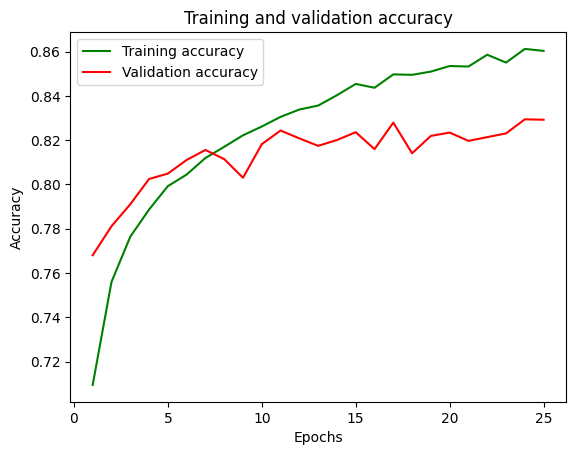

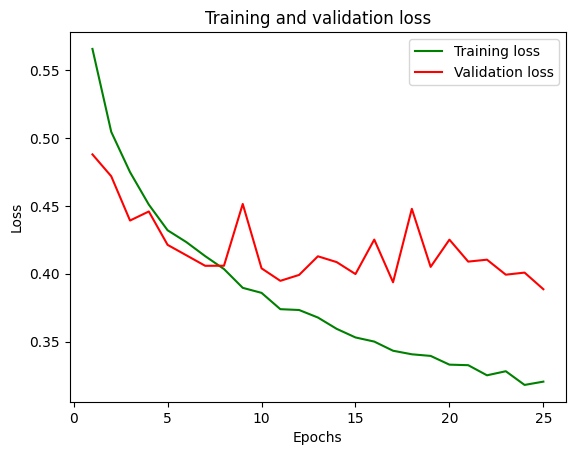

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [30]:
import pickle

with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer_obj, tokenizer_file)

In [31]:
model_json = model.to_json()
with open("sarcasm_detection_model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to an HDF5 file
model.save_weights("sarcasm_detection_model_weights.h5")

print("Model and weights saved successfully.")

Model and weights saved successfully.


# Prediction

In [32]:
def predict_sarcasm(s ):
    x_final = pd.DataFrame({"headline":[s]})
    test_lines = CleanTokenize(x_final)
    test_sequences = tokenizer_obj.texts_to_sequences(test_lines)
    test_review_pad = pad_sequences(test_sequences, maxlen=max_length, padding='post')
    pred = model.predict(test_review_pad)
    pred*=100
    if pred[0][0]>=50: return "Sentence contains sarcasm!" 
    else: return "Sentence does not contain sarcasm."

In [33]:
predict_sarcasm("I was depressed. He asked me to be happy. I am not depressed anymore.")

1/1 [==============================] - 0s 15ms/step


'Sentence contains sarcasm!'

In [24]:
predict_sarcasm("You just broke my car window. Great job.")

1/1 [==============================] - 0s 30ms/step


'Sentence contains sarcasm!'

In [25]:
predict_sarcasm("You just saved my dog's life. Thanks a million.")

1/1 [==============================] - 0s 29ms/step


'Sentence does not contain sarcasm.'